In [2]:
import numpy as np
import torch.nn as nn 
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('../financial_data.csv' , parse_dates = ['Unnamed: 0']).rename(columns = {'Unnamed: 0' : 'date'}).set_index('date')

In [4]:
df.fillna(method = 'ffill' , inplace = True)
df_T = df.T
df_T.tail()

date,2013-02-08 00:00:00,2013-02-11 00:00:00,2013-02-12 00:00:00,2013-02-13 00:00:00,2013-02-14 00:00:00,2013-02-15 00:00:00,2013-02-19 00:00:00,2013-02-20 00:00:00,2013-02-21 00:00:00,2013-02-22 00:00:00,...,2018-01-25 00:00:00,2018-01-26 00:00:00,2018-01-29 00:00:00,2018-01-30 00:00:00,2018-01-31 00:00:00,2018-02-01 00:00:00,2018-02-02 00:00:00,2018-02-05 00:00:00,2018-02-06 00:00:00,2018-02-07 00:00:00
XYL,27.09,27.46,27.95,28.26,28.47,28.28,28.76,27.96,27.68,27.79,...,73.24,74.41,73.41,73.07,72.26,74.84,75.66,72.66,71.33,71.79
YUM,65.30,64.55,64.75,64.41,63.89,63.99,65.15,64.56,65.05,65.45,...,85.66,86.20,86.48,84.59,84.59,83.98,82.63,79.80,80.58,80.13
ZBH,75.85,75.65,75.44,76.00,76.34,75.90,76.11,75.31,73.87,74.14,...,124.74,126.23,127.39,125.94,127.12,128.19,125.79,123.18,122.30,120.78
ZION,24.14,24.21,24.49,24.74,24.63,24.34,24.69,24.14,23.73,24.04,...,53.02,54.02,54.19,53.93,54.03,54.98,54.15,51.65,52.52,54.02
ZTS,33.05,33.26,33.74,33.55,33.27,33.98,33.84,32.72,32.56,32.59,...,79.25,80.09,79.18,78.35,76.73,77.82,76.78,73.83,73.27,73.86


In [5]:
batch_size = 64
#x_dim  = X_train.shape[1]
hidden_dim = 200
latent_dim = 2
lr = 1e-3
epochs = 10

In [92]:
from vrae import VRAE

In [93]:
model = VRAE(sequence_length=1 , number_of_features = 1259 , batch_size=1 , hidden_size=hidden_dim , n_epochs= 100 , latent_length= latent_dim, print_every = 10)

/Users/alibakkoury/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [35]:
from torch.utils.data import DataLoader 

data = torch.tensor(df.T.values).unsqueeze(1)
print(data.size())
loader = DataLoader(data , batch_size = 1)

torch.Size([475, 1, 1259])


In [36]:
for i in range(1):
    model._train(loader)

Batch 10, loss = 1914502.5000, recon_loss = 1914499.6250, kl_loss = 2.8213
Batch 20, loss = 2729573.5000, recon_loss = 2729563.5000, kl_loss = 10.0978
Batch 30, loss = 293248.1250, recon_loss = 293228.2812, kl_loss = 19.8544
Batch 40, loss = 18052338.0000, recon_loss = 18052324.0000, kl_loss = 13.8606
Batch 50, loss = 23338658.0000, recon_loss = 23338642.0000, kl_loss = 15.6419
Batch 60, loss = 20219658.0000, recon_loss = 20219636.0000, kl_loss = 21.4152
Batch 70, loss = 536366.3125, recon_loss = 536346.3750, kl_loss = 19.9553
Batch 80, loss = 1216928.6250, recon_loss = 1216911.3750, kl_loss = 17.2613
Batch 90, loss = 1328338.3750, recon_loss = 1328326.5000, kl_loss = 11.8755
Batch 100, loss = 272768768.0000, recon_loss = 272768768.0000, kl_loss = 6.3859
Batch 110, loss = 11464409.0000, recon_loss = 11464403.0000, kl_loss = 6.3971
Batch 120, loss = 4728787.0000, recon_loss = 4728783.0000, kl_loss = 3.8419
Batch 130, loss = 1076373.5000, recon_loss = 1076372.3750, kl_loss = 1.1328
Batch

In [37]:
r = []
for data in loader:
    _ , res = model(data.float().permute(1,0,2))
    r.append(res)
res = torch.cat(r , 0)
res = (res.mean(0)).unsqueeze(0)

In [38]:
hat = model.decode(res)
noise = torch.randn(1,2)
hat_n = model.decode(noise)

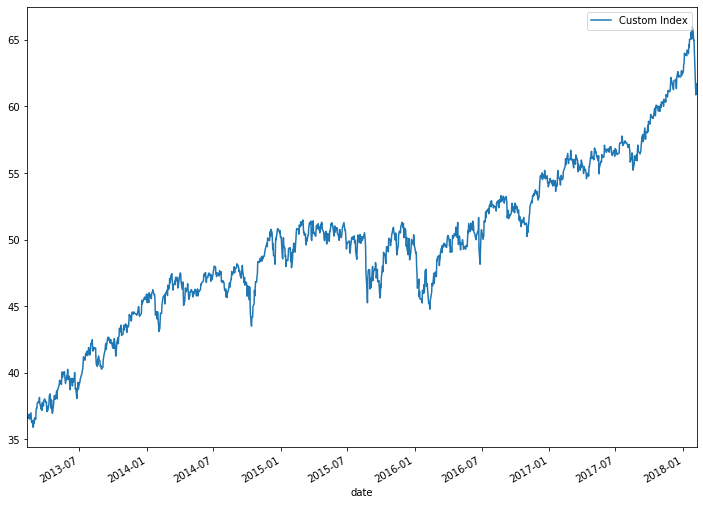

In [39]:
#futures['Last'].plot()
custom = pd.DataFrame(hat.squeeze().squeeze().detach().numpy(), index = df.index).rename(columns = {0 : 'Custom Index'})
custom_n = pd.DataFrame(hat_n.squeeze().squeeze().detach().numpy(), index = df.index).rename(columns = {0 : 'Custom Index'})
#custom_s = pd.DataFrame(mms.fit_transform(custom) , columns = custom.columns , index = custom.index)
custom.plot(figsize = (12, 9))
#futures_s['Last'].plot(label = 'Index')
plt.legend()
plt.savefig('customIndex.png')

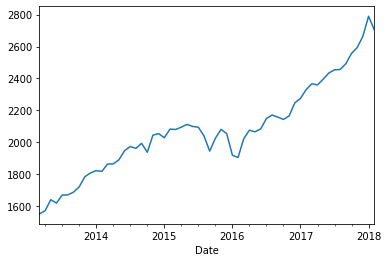

In [169]:
from datetime import datetime

index = pd.read_csv('data_csv.csv' , parse_dates = ['Date']).set_index('Date')
index = index[(index.index >= datetime(2013,2,8)) & (index.index <= datetime(2018,2,7))]
index['SP500'].plot()

In [75]:
r = []
for data in loader:
    _ , res = model(data.float().permute(1,0,2))
    r.append(res)
res = torch.cat(r , 0)

In [158]:
latent = pd.DataFrame(res.detach().numpy() , columns = ['X' , 'Y'] , index = df.T.index)

In [159]:
partition = np.random.choice(475 ,50)

USB     0.651192
TWX     0.698352
ZION    0.740757
STT     0.765403
SYMC    1.000000
Name: SYMC, dtype: float64


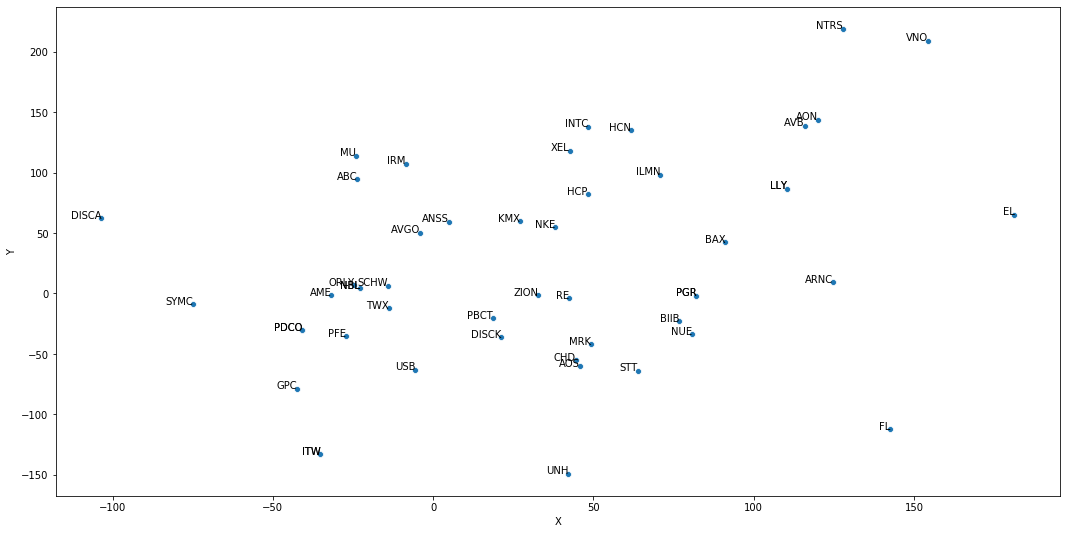

In [200]:
import seaborn as sns

plt.figure(figsize = (18,9))
latents = latent.iloc[partition]
sns.scatterplot(x = 'X' , y = 'Y' , data = latents*100)
print(df.iloc[:,partition].corr()['SYMC'].sort_values().tail())
for i, txt in enumerate(latents.index.values):
    plt.annotate(txt, (latents.X[i]*100,latents.Y[i]*100), size=10, xytext=(0,0), ha='right', textcoords='offset points')

<Figure size 1296x648 with 0 Axes>

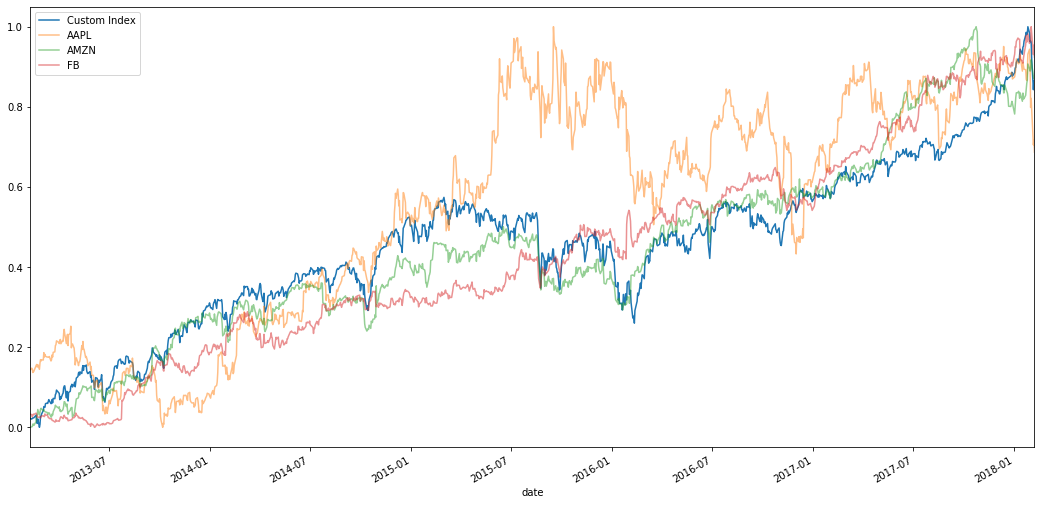

In [198]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
dfs = pd.DataFrame(mms.fit_transform(df) , columns = df.columns , index = df.index)
plt.figure(figsize = (18,9))
pd.DataFrame(mms.fit_transform(custom) , columns = custom.columns, index = custom.index).plot(figsize = (18,9))
dfs['LLY'].plot(label = 'AAPL' , alpha = 0.5)
dfs['AON'].plot(label = 'AMZN', alpha = 0.5)
dfs['FB'].plot(label = 'FB', alpha = 0.5)
plt.legend()


In [202]:
custom.to_csv('custom_index.csv')

In [94]:
#Créer un indice pour les GAFAM: 

GAFAM_names = ['GOOGL' , 'AAPL' , 'FB' , 'AMZN' , 'MSFT']
GAFAM = df[GAFAM_names]
GAFAM.head()

,GOOGL,AAPL,FB,AMZN,MSFT
date,,,,,
2013-02-08,393.0777,67.8542,28.5450,261.95,27.55
2013-02-11,391.6012,68.5614,28.2600,257.21,27.86
2013-02-12,390.7403,66.8428,27.3700,258.70,27.88
2013-02-13,391.8214,66.7156,27.9075,269.47,28.03
2013-02-14,394.3039,66.6556,28.5000,269.24,28.04


In [95]:
from torch.utils.data import DataLoader 
data = torch.tensor(GAFAM.T.values).unsqueeze(1)
print(data.size())
loader = DataLoader(data , batch_size = 1)

torch.Size([5, 1, 1259])


In [100]:
for i in range(50):
    model._train(loader)

Average loss: 295530912.6250
Average loss: 293528303.5000
Average loss: 291065617.6875
Average loss: 288537181.5625
Average loss: 285908373.8750
Average loss: 283242083.1562
Average loss: 280578147.5938
Average loss: 277909819.6250
Average loss: 275244069.6250
Average loss: 272616902.0469
Average loss: 270040290.1719
Average loss: 267441636.9219
Average loss: 264881208.8281
Average loss: 262184716.1406
Average loss: 259345019.6328
Average loss: 256449739.2109
Average loss: 253580575.1992
Average loss: 250823745.4102
Average loss: 248230709.9062
Average loss: 245828219.9258
Average loss: 243619205.9219
Average loss: 241587434.3555
Average loss: 239706353.8594
Average loss: 237947285.3594
Average loss: 236284722.8594
Average loss: 234698062.3672
Average loss: 233171712.0625
Average loss: 231694534.2031
Average loss: 230258653.9062
Average loss: 228858730.5938
Average loss: 227491344.2500
Average loss: 226154321.4219
Average loss: 224846434.4375
Average loss: 223567020.8750
Average loss: 

In [101]:
r = []
for data in loader:
    _ , res = model(data.float().permute(1,0,2))
    r.append(res)
res = torch.cat(r , 0)
res = (res.mean(0)).unsqueeze(0)

In [102]:
hat_gafam = model.decode(res)
noise = torch.randn(1,2)
hat_n = model.decode(noise)

In [103]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

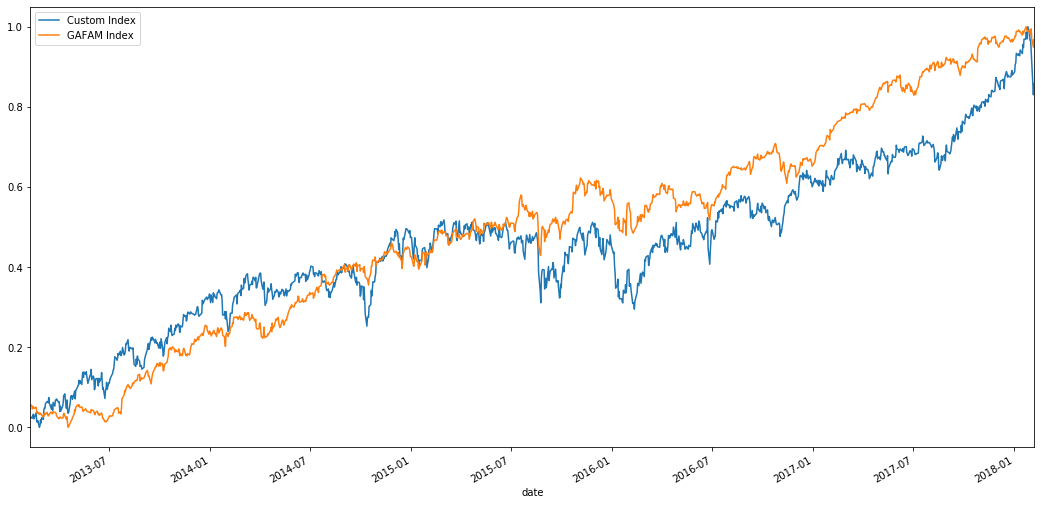

In [104]:
#custom_gafam = pd.DataFrame(hat_gafam.squeeze().squeeze().detach().numpy(), index = df.index).rename(columns = {0 : 'GAFAM Index'})
custom['GAFAM Index'] = hat_gafam.squeeze().squeeze().detach().numpy()
custom_i = pd.DataFrame(mms.fit_transform(custom) , columns = custom.columns , index = custom.index)
custom_i.plot(figsize = (18,9))
#futures_s['Last'].plot(label = 'Index')
plt.legend()
plt.savefig('customIndex.png')

In [85]:
df['Custom Index'] = custom['Custom Index']
df['GAFAM Index'] = custom['GAFAM Index']
df_pct = df.pct_change().dropna()

In [91]:
#df_pct.corr()[['Custom Index' , 'GAFAM Index']].sort_values(by = 'GAFAM Index' , ascending = False)

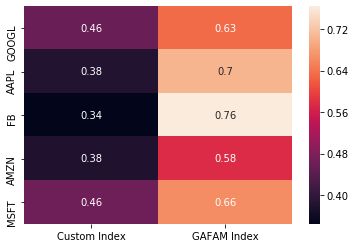

In [87]:
import seaborn as sns
sns.heatmap(df_pct.corr()[['Custom Index' , 'GAFAM Index']].loc[GAFAM_names] , annot = True)
plt.savefig('gafam_correlation.png')

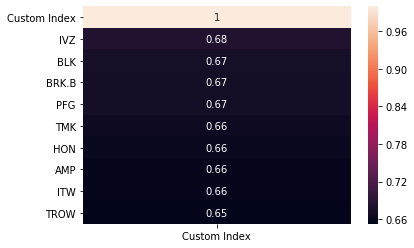

In [110]:
sns.heatmap(df_pct.corr()[['Custom Index']].sort_values(by = 'Custom Index' , ascending = False)[:10] , annot = True)